In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
LR_Model = LinearRegression()

In [3]:
import pandas as pd
file_path = "Used Car Dataset.csv"
data = pd.read_csv(file_path)

In [4]:
data

,Unnamed: 0,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,5,56000,2017,7.81,2996,2996,333,63.75
1,1,5,30615,2020,17.40,999,999,9863,8.99
2,2,5,24000,2018,20.68,1995,1995,188,23.75
3,3,5,18378,2019,16.50,1353,1353,13808,13.56
4,4,5,44900,2019,14.67,1798,1798,17746,24.00
...,...,...,...,...,...,...,...,...,...
1485,1547,7,26500,2022,26.11,1462,1462,8663,11.50
1486,1548,5,35000,2020,1493.00,11345,11345,250,17.41
1487,1550,5,49000,2017,17.50,1199,1199,887,5.85
1488,1551,5,40000,2018,18.78,999,999,75,4.75


In [14]:
x = data[['seats','kms_driven','manufacturing_year','mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)']].values
y = data['price(in lakhs)'].values.reshape(-1,1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
LR_Model.fit(x_train, y_train)


LinearRegression()

In [19]:
print("Intercept:", LR_Model.intercept_)
print("Coefficients:", LR_Model.coef_)

Intercept: [412799.85802305]
Coefficients: [[ 5.07376728e+01 -1.02274672e-02 -2.04343768e+02  1.03131417e+00
  -5.29304858e-02 -5.29304858e-02 -8.91854579e-04]]


In [20]:
y_train_predict = LR_Model.predict(x_train)
y_test_predict = LR_Model.predict(x_test)

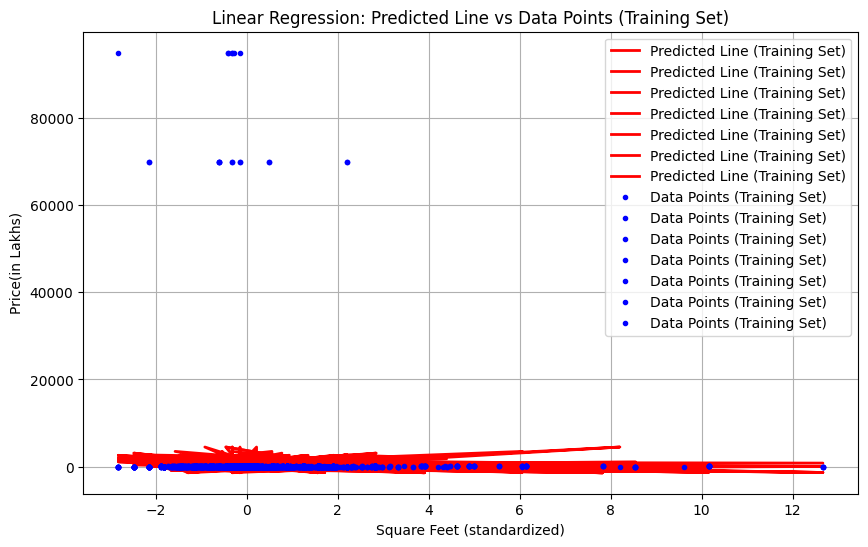

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_train_scaled, y_train_predict, "r-", linewidth=2, label="Predicted Line (Training Set)")
plt.plot(x_train_scaled, y_train, "b.", label="Data Points (Training Set)")
plt.xlabel("Square Feet (standardized)")
plt.ylabel("Price(in Lakhs)")
plt.title("Linear Regression: Predicted Line vs Data Points (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

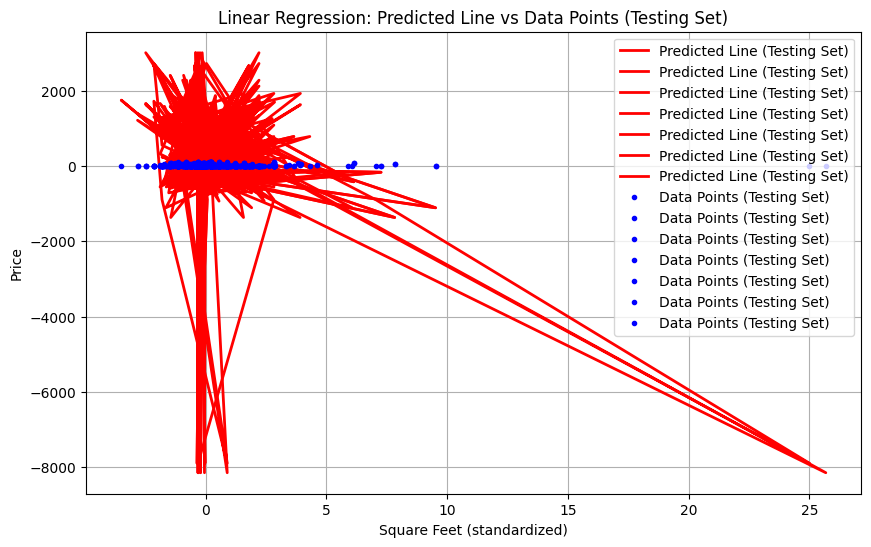

In [22]:
# Plotting the results for the testing set
plt.figure(figsize=(10, 6))
plt.plot(x_test_scaled, y_test_predict, "r-", linewidth=2, label="Predicted Line (Testing Set)")
plt.plot(x_test_scaled, y_test, "b.", label="Data Points (Testing Set)")
plt.xlabel("Square Feet (standardized)")
plt.ylabel("Price")
plt.title("Linear Regression: Predicted Line vs Data Points (Testing Set)")
plt.legend()
plt.grid(True)
plt.show()